In [135]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.util import montage


In [136]:
for i in range(1 , 62 , 2):
            file_name = "U"+str(i)+".png"
            img = imread(file_name)
            img = resize(img , (224 , 224, 3))
            

            file_name_2 = "U"+str(i+1)+".png"
            img_2 = imread(file_name_2)
            img_2 = resize(img_2 ,(224 , 224, 3) )

            montageVertical = np.append(img , img_2 , axis=1)
            plt.imsave("Un"+str(i)+".png"  ,montageVertical)

In [137]:
x = [] 
for i in range(1, 62 , 2):
            file_name = "Un"+str(i)+".png"
            img = imread(file_name)
            if(i == 1):
                img= np.resize(img ,(2 , 96 , 96 , 3))
                x =  img
            else:
                img= np.resize(img ,(2 , 96  , 96 , 3))
                x = np.append(x , img , axis = 0)

In [138]:
x.shape

(62, 96, 96, 3)

In [139]:
x_t = np.reshape(x , (-1 , 2 , 96 , 96 , 3))
x_t.shape

(31, 2, 96, 96, 3)

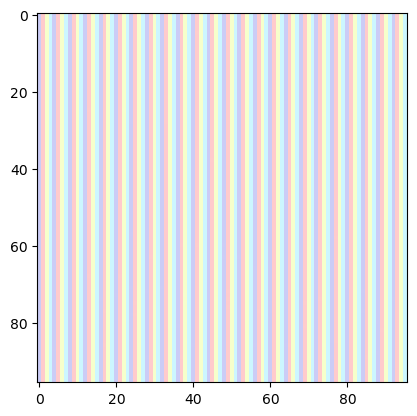

In [140]:
plt.imshow(x[7])

In [141]:
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model

classifier =keras.models.load_model('classifier.h5')
classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 94, 94, 192)          5376      ['input_1[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 94, 94, 192)          5376      ['input_2[0][0]']             
                                                                                              

In [142]:
x_1_t, x_2_t = tf.split(x_t, num_or_size_splits=2, axis=1)
x_1_t = tf.squeeze(x_1_t, axis=1)
x_2_t = tf.squeeze(x_2_t, axis=1)

classification = classifier.predict([x_1_t,x_2_t])

2023-08-15 18:58:21.167393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 390ms/step


In [143]:
labels = [2 , 2 , 2 , 0 , 1 , 1 , 3 , 3 , 3  , 3, 0 , 1 , 0 , 1 , 2 , 0 , 2 , 2 , 3 , 3 , 1  ,1  ,0 , 0 , 2 , 2 , 1 , 1 ,0 , 0 , 1 ]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)
from keras.utils import to_categorical 
y_t = to_categorical(Y)
y_t

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [144]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest' 
)

In [160]:
classifier.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [161]:
h = classifier.fit([x_1_t,x_2_t] , y_t  , batch_size = 23 , epochs = 300  , verbose = 1)

Epoch 1/300


2023-08-15 19:02:50.145831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 1.1321 - accuracy: 0.4839
Epoch 2/300
2/2 [==============================] - 0s 117ms/step - loss: 0.6181 - accuracy: 0.6774
Epoch 3/300
2/2 [==============================] - 0s 94ms/step - loss: 0.9409 - accuracy: 0.5806
Epoch 4/300
2/2 [==============================] - 0s 76ms/step - loss: 0.6044 - accuracy: 0.8387
Epoch 5/300
2/2 [==============================] - 0s 117ms/step - loss: 0.8461 - accuracy: 0.6452
Epoch 6/300
2/2 [==============================] - 0s 75ms/step - loss: 0.7333 - accuracy: 0.5806
Epoch 7/300
2/2 [==============================] - 0s 65ms/step - loss: 0.5846 - accuracy: 0.6452
Epoch 8/300
2/2 [==============================] - 0s 116ms/step - loss: 0.6895 - accuracy: 0.6452
Epoch 9/300
2/2 [==============================] - 0s 136ms/step - loss: 0.7367 - accuracy: 0.6129
Epoch 10/300
2/2 [==============================] - 0s 66ms/step - loss: 0.8981 - accuracy: 0.6129
Epoch 11/300
2/2 [===========

In [162]:
classification = classifier.predict([x_1_t,x_2_t])
predicted_class = []
for i in classification:
    predicted_class.append(np.argmax(i))
name_class = []
for i in predicted_class:
    if(i == 2):name_class.append("push_p_joint")
    elif(i == 0):name_class.append("Not articulated")
    elif(i == 1):name_class.append("P-joint")
    elif(i == 3):name_class.append("R-joint")

2023-08-15 19:03:52.895890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 294ms/step


In [163]:
predicted_class

[2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1]

In [164]:
x = [] 
for i in range(1, 62 , 2):
            file_name = "Un"+str(i)+".png"
            img = imread(file_name)
            if(i == 1):
                x =  img
            else:
                x = np.append(x , img , axis = 0)
x = x.reshape((-1 , 224 ,448 , 4))
x.shape

(31, 224, 448, 4)

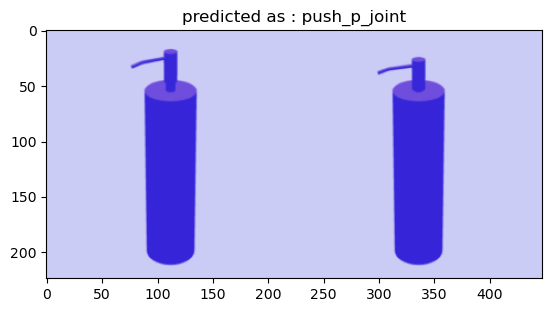

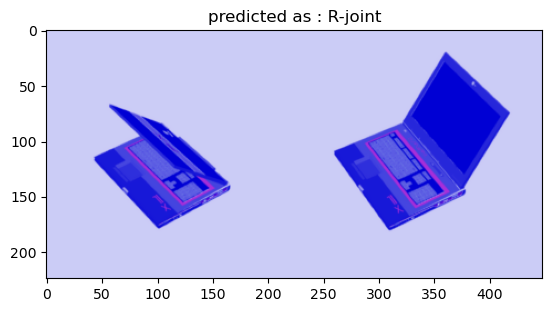

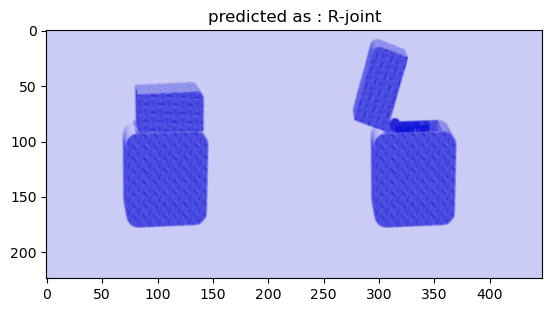

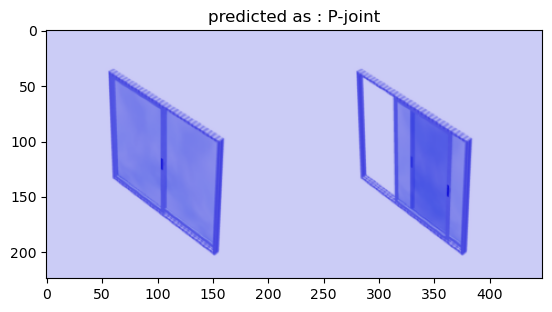

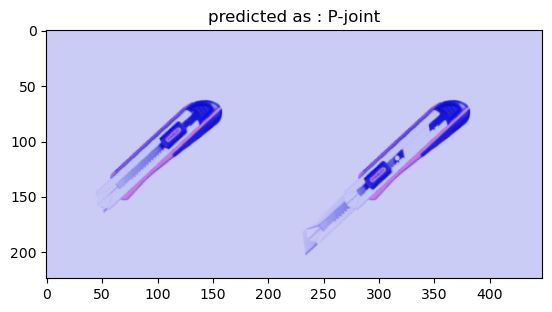

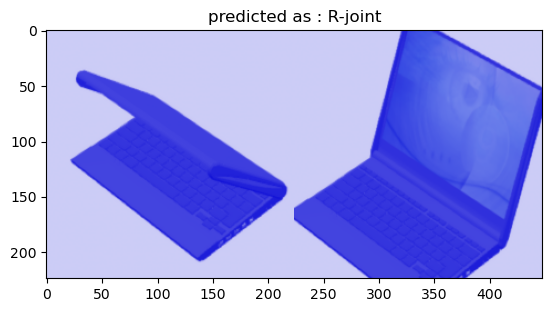

In [187]:
plt.imshow(x[1])
plt.title("predicted as : " + name_class[1])
plt.show()

plt.imshow(x[7])
plt.title("predicted as : " + name_class[7])
plt.show()

plt.imshow(x[8])
plt.title("predicted as : " + name_class[8])
plt.show()


plt.imshow(x[5])
plt.title("predicted as : " + name_class[5])
plt.show()

plt.imshow(x[-1])
plt.title("predicted as : " + name_class[-1])
plt.show()

plt.imshow(x[-12])
plt.title("predicted as : " + name_class[-12])
plt.show()

In [194]:
from sklearn.metrics import accuracy_score , classification_report
print(classification_report(labels , predicted_class ))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.50      1.00      0.67         9
           2       1.00      0.62      0.77         8
           3       0.86      1.00      0.92         6

    accuracy                           0.68        31
   macro avg       0.84      0.69      0.65        31
weighted avg       0.83      0.68      0.63        31

